# Project: Investigate a Dataset
## No-Show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset is a compilation of medical appointments that were made in Brazil, spanning a 7-month timeframe. This analysis will explore some trends between those patients who keep their appointments and those that do not show up. The data provides the following information that may provide insights into the details surrounding each appointment.

><ul>
><li>PatientId: Key index for maintaining patient confidentiality and keeping patients as separate entities.</li>
><li>AppointmentID: Index for separating repeat appointment if any exist.</li>
><li>ScheduledDay: The date when the appointment was scheduled. The difference between the ScheduledDay and the AppointmentDate may show some correlation between keeping the appointment or not.</li>
><li>AppointmentDay: The date of the scheduled appointment.</li>
><li>Age: There may be some correlation between the age of a person and the likelihood of attending the appointment.</li>
><li> Neighbourhood: This references the geographical location of the hospital. The affluence of the area may have an impact on the reliability of the patients.</li>
><li>Scholarship: This shows if the person is a part of Brazil's welfare program.</li>
><li>Hipertension: Indicates if the patient has high blood pressure. Current health conditions may be a contributing factor.</li>
><li>Diabetes: Indicates if the patient is a diabetic. Current health conditions may be a contributing factor.</li>
><li>Alcoholism: Indicates if the patient consumes alcohol. Current lifestyle choices may be a contributing factor.</li>
><li>Handcap: Indicates if the patient has special needs. Current health conditions may be a contributing factor.</li>
><li>SMS_received: Indicates if the patient received a text reminder about the appointment. This reminder could improve the chances that the appointment would be remembered and attended.</li>
><li>No-show: Indicates if the patient attended the appointment or not. This is at the heart of investigation.</li>
</ul>

### Question(s) for Analysis
> What factors have the greatest impact as to whether a patient will keep his or her appointment or not, specifically the person's age, the gender of the patient, or the amount of time between scheduling the appointment and going to the appointment?

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
# Load data; appt stands for appointment 
df_appt = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df_appt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Look at the shape to see how many patients exist
df_appt.shape

(110527, 14)

In [4]:
#View summary statistics to get a feel for the data
df_appt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#Check for missing data
df_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#View number of unique values for each column of data
df_appt.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> The initial observations of the data show that it is fairly clean with no missing values, though there is an age of -1, which is not possible and will most likely be dropped if it is a small number of records. The biggest issue is that the ScheduledDay and AppointmentDay columns are not a datetime datatype as they should be. Not all of the columns are necessary for the factors that will be evaluated based on our question, so they will be dropped to help provide focus. The columns that will be dropped include: PatientId, AppointmentID, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, and SMS_received.  


### Data Cleaning

 
 

> The first cleaning item is to remove the record in the dataset where the age of the person was listed as -1. This code will find the applicable records and delete it from the dataset.

In [7]:
df_appt.drop(df_appt.loc[df_appt['Age'] == -1].index, inplace = True)

> Next, we will remove the extraneous columns that are not directly pertinent to our investigation questions. If our investigation would have used the "Hipertension", "Neighbourhood", or "Handcap" columns, I would have renamed them to correct the spelling errors and to replace the insensitive term of "Hancap" to the more politically correct "Disability" - short for "A Person with a Disability". 

In [8]:
df_appt.drop(['PatientId', 'AppointmentID', 'Neighbourhood', 'Scholarship', 'Hipertension', 
              'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'], axis=1, inplace=True)

> Next, our dependent variable is "No-show", which was stored with yes and no values. We will convert these values to be a numeric boolean of 0 and 1. This will allow other independent variables to interact with the data more easily.

In [9]:
df_appt['No-show'] = np.where((df_appt['No-show'] == 'Yes'), 1, df_appt['No-show'])
df_appt['No-show'] = np.where((df_appt['No-show'] == 'No'), 0, df_appt['No-show'])

> Finally, the ScheduledDay and AppointmentDay columns will be converted into a datetime datatype so that we can perform date functions on it that simply won't work with text strings.  Also in order to better analyze the relationship between these two date values, we will create a new column called "Difference" that will be populated with the difference between the date of the appointment and the date that the appointment was scheduled for in days.

In [10]:
df_appt['ScheduledDay'] = pd.to_datetime(df_appt['ScheduledDay']).dt.date
df_appt['AppointmentDay'] = pd.to_datetime(df_appt['AppointmentDay']).dt.date

In [11]:
df_appt['Difference'] = (df_appt['AppointmentDay'] - df_appt['ScheduledDay']).dt.days
df_appt.head()

,Gender,ScheduledDay,AppointmentDay,Age,No-show,Difference
0,F,2016-04-29,2016-04-29,62,0,0
1,M,2016-04-29,2016-04-29,56,0,0
2,F,2016-04-29,2016-04-29,62,0,0
3,F,2016-04-29,2016-04-29,8,0,0
4,F,2016-04-29,2016-04-29,56,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> For our exploratory data analysis, the dependent variable is if a patient went to his or her appointment.  The following code will create masks for those patients who kept his or her appointments and for those patients who are listed as a no-show. This will make the analysis more efficient.  


In [111]:
showed = df_appt['No-show'] == False
no_show = df_appt['No-show'] == True

>Additionally, we will be plotting our data in various ways. To reduce the amount of redundant code, we will create a function to print our histogram plots.

In [84]:
def histPlot(df, xVar):
    
    # set plot dimensions
    plt.figure(figsize = [16,9])

    # set legend labels
    myLabels = "Proportion No Show (All Patients)", 'Showed Up', 'No Show'
    
    # plot
    df.groupby([xVar])['No-show'].value_counts(normalize= True).unstack().plot.bar(rot = 0, width = 0.8, alpha = 0.75);
    
    # plot reference line for the overall proportion for no shows
    plt.axhline(df['No-show'].mean(), color='black', ls = "-.", alpha = 0.5);
    
    # title/label
    plt.title(f'Distribution of Patients by Appointment Status and {xVar}');
    plt.xlabel(xVar);
    plt.ylabel('Number of Patients');
    plt.legend(loc = 'best', labels = myLabels);

### Is a patient more likely to keep an appointment if he or she is older?

> Many people believe that maturity comes with age. It would make sense that people who are older may take their health more seriously. First, we will compare the average age of those patients who showed up to his or her appointment with the average age of patients who were no shows.

In [40]:
(df_appt.Age[showed].mean(), df_appt.Age[no_show].mean())

(37.790504154999034, 34.317666562121957)

> The averages are closer together than I suspected.  To more accurately work with the data, we will create an age group variable to separate the values into 10-year age groups.

In [41]:
# create age intervals using floor division (lowest integer value)
df_appt['Age Groups'] = ((df_appt['Age']//10)*10).astype(int)

# look at the distribution
df_appt['Age Groups'].value_counts().sort_index()

0      17475
10     12936
20     13699
30     15171
40     14209
50     15863
60     11876
70      5934
80      2946
90       406
100        6
110        5
Name: Age Groups, dtype: int64

>Next, we will plot the distribution of age in a histogram to visually see the range and shape of the data, using the proportions to more accurately compare the no-shows with the shows.

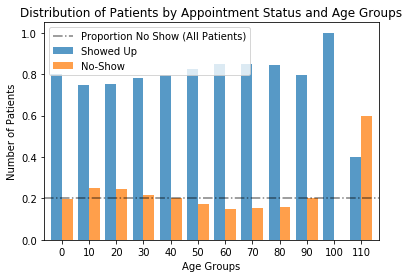

In [60]:
histPlot(df_appt, 'Age Groups');

> The proportion of no-shows is fairly close to the overall proportion of no-shows among all of the patients. The impact of age may not be the best exploration of the data since minor children or seniors with driving restrictions are entirely dependent on an adult who is most likely in that "mature" age range. 

### Are female patients more likely to keep her appointments than male patients?

> It is unlikely that the number of males and females in this dataset are equal. First, we will find the total number of males and females in the dataset. The result of this comparison will affect the next steps in answering this question.

In [63]:
# group by gender and get value counts for No-show
df_appt.groupby(['Gender'])['No-show'].value_counts().unstack()

No-show,0,1
Gender,,
F,57245,14594
M,30962,7725


> There are roughly double the amount of females to males in our dataset. To properly compare going forward, we will find the proportion of show/no-show values for the appointments and then plot those values on a pie chart for each gender.

In [64]:
# calculate proportions with normalize = true
df_appt.groupby(['Gender'])['No-show'].value_counts(normalize=True).unstack()

No-show,0,1
Gender,,
F,0.796851,0.203149
M,0.800321,0.199679


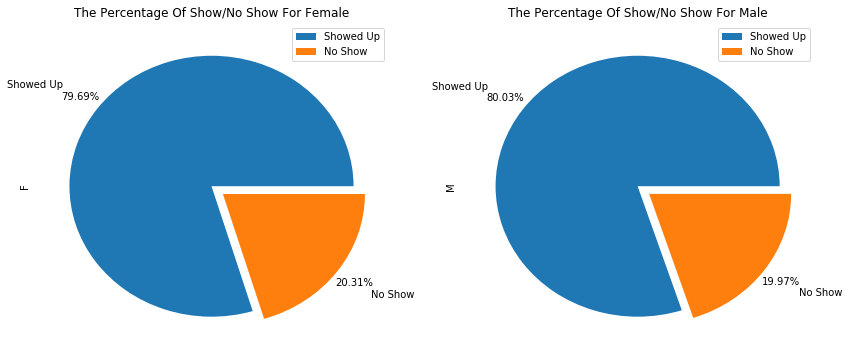

In [106]:
# Plot the data in a pie chart
axes = df_appt.groupby(['Gender'])['No-show'].value_counts().unstack().T.plot.pie(subplots=True,
                                                                                 autopct='%1.02f%%', 
                                                                                 pctdistance=1.15, 
                                                                                 labeldistance=1.3,
                                                                                 figsize=[14,6],
                                                                                 explode=[0,0.1],
                                                                                 labels = myLabels);

for gender, ax in zip(["Female", "Male"], axes):
    ax.set_title(f"The Percentage of Show/No Show for {gender}".title());

> The results here are shockingly equivalent. I would not have expected the difference between females and males to be about 0.5%.

### Is a patient more likely to keep an appointment if the time between the scheduled and appointment days is small?

> The first step to answering this question was completed during the cleaning process, where a new column that calculated the difference between the day of the appointment and the day the appointment was scheduled was created. Next, we'll examine the key statistics for the column.

In [108]:
df_appt['Difference'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Difference, dtype: float64

> A brief look at the key statistics of the Difference column shows a signficant difference between the mean and the median, which would imply a skewed distribution. Next we will compare the two means and two medians.

In [109]:
#Calculate the mean of the patients who showed up, followed by the mean of the no-show patients.
(df_appt.Difference[showed].mean(), df_appt.Difference[no_show].mean())

(8.7547586926207668, 15.83148886598862)

In [110]:
#Calculate the median of the patients who showed up, followed by the median of the no-show patients.
(df_appt.Difference[showed].median(), df_appt.Difference[no_show].median())

(2.0, 11.0)

>To more accurately work with the data, we will create a time difference group variable to separate the values into 5-day interval groups and then compute the proportions of shows/no-shows for those intervals.

In [121]:
# create time intervals of the time difference using floor division (lowest integer value)
df_appt['Time Difference Group']=((df_appt['Difference']//10)*5).astype(int)

# look at the distribution
df_appt['Time Difference Group'].value_counts().sort_index()

-5         5
 0     74684
 5     13914
 10    10841
 15     5648
 20     2124
 25     1142
 30     1173
 35      537
 40      183
 45      137
 50       34
 55       19
 60        7
 65       13
 70        9
 75       11
 80       19
 85       26
Name: Time Difference Group, dtype: int64

> Finally, we'll plot the data to view the distribution.

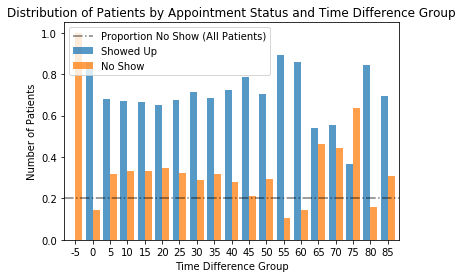

In [122]:
# Plot the data on a histogram using histPlot function
histPlot(df_appt, 'Time Difference Group');

> This visualization shows that many people make last minute appointments and are more prone to attend those when they were made the same day.  Other than that first 5-day interval, the rates of each group remain fairly constant for the first 40 days, which would suggest that the difference in time is not a huge contributor to patients missing their appointments. 

<a id='conclusions'></a>
## Conclusions

> After concluding our analysis, we did not find strong evidence for any particular reason we investigated that would reliably contribute to a patient missing a scheduled medical appointment.  

> In regards to the question of age, the dataset was complicated by minors who would not have a choice as to whether or not he or she went to the doctor. With the exception of the first bin of data, the distribution of the patients who showed up is roughly normally distributed. Potentially using a smaller bin size could show a bimodal distribution. A more accurate picture could be obtained if the age of the guardian was captured for underage children. This would more accurately reflect the ages of those with the burden of responsibility. The distribution of the no-shows is slightly skewed to the right, which would imply that more younger people than older people don't keep their appointments. 

> The results of the gender comparison were astonishing to me. The proportions between men and women were nearly identical between those who kept the appointment and those who were no shows. This would strongly suggest that the gender of the individual is irrelevant to showing up to the appointment or not. 

> The data for the time between scheduling the appointment and the date of the appointment was significantly skewed to the right for both the appointment keepers and the no-show patients. To me, this data mostly shows that many people schedule last minute appointments. If there had been a causal relationship, I would have expected the appointment keeper data to be skewed right while the no-shows would be skewed left or normally distributed. 

> A place for further exploration would be in evaluating patients with pre-existing medical conditions, including hypertension, diabetes and disabilities. An analysis of the financial situation of patients could also impact the reliability of going to appointments; this could tie together the neighborhood location of the hospital and those patients on welfare healthcare.




### Limitation
> The exploration of the data viewed all appointments as completely separate events. This fails to take into account patients who have multiple appointments within the dataset. There is the potential for the results to be skewed either way based on the behavior of an individual patient with multiple appointments.



In [124]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0